<a href="https://colab.research.google.com/github/mrsferret/Machine-Learning-ITNPBD6-/blob/main/ExercisesSession7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 7.3 - Hyper Parameter Tuning

In this practical, we will tune the hyper-parameters of a MLP model. Let's start by getting a dataset, doing a little preprocessing, and creating and training a MLP model that we can tune.


We begin by importing the necessary libraries.

In [ ]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

Now we load the dataset, and preprocess it

In [ ]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Preprocess data
X_train = MinMaxScaler().fit_transform(X_train)

And finally, we create an NLP model

In [ ]:
# Create a MLP model
mlp_model = MLPClassifier()

Now that we have a model created with the default hyperparameters, we will test it using cross validation accuracy as the metric.

In [ ]:
# Determine the splits
splits = KFold(n_splits=5)
# Test Model
score = np.mean(cross_val_score(mlp_model, X_train, y_train, cv=splits, scoring='accuracy'))
print("Average accuracy: " + str(score))

/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average accuracy: 0.9199999999999999


/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As you can see, this is quite a good model, but choosing better hyperparameters may be able to improve it.
**Try manually altering the values in the code below and try to find the best values.**

In [ ]:
mlp_model = MLPClassifier(solver='adam', hidden_layer_sizes=(10), max_iter=800, activation='relu')
score = np.mean(cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy'))
print("Average accuracy: " + str(score))

/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Average accuracy: 0.9200000000000002


/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Now that you have seen how tricky and time consuming it can be to find the optimal parameters manually, we will try using gridsearch. Remember that this searches through a large number of permutations, so it make take some time (Tip: to the left of the code, it says 'In[ ]' in blue text. While python code is running, it becomes 'In[*]', and the asterix disappears after it has completed)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the Param Grid
param_grid = {"hidden_layer_sizes": [(5), (10)],
              "activation": ['identity', 'tanh'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.01, 0.001]}


# Determine the splits and perform the grid search
grid = GridSearchCV(mlp_model, param_grid, cv=splits, n_jobs=-1).fit(X_train, y_train)

# Select the best estimators
mlp_model_tuned=grid.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid.best_params_))
print("Cross Validation accuracy: " + str(mlp_model_tuned.score(X_train,y_train)))

/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.

/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.

/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/oldchap/anaconda3/lib/python3.

Best Hyperparameters found: {'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 10, 'solver': 'adam'}
Cross Validation accuracy: 0.95


/home/oldchap/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


As you can see in the grid that we used, there were only a very small number of values in the search (only two for each hyperparameter). **Visit https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html and find some other values for the hyperparameters, add them to the grid in the code, and see if you can improve the results.**

# Section 7.5 - Local Search

To begin, we need to have something that we want to find the optimal value for. This is best achieved by defining it inside a function like this:

In [ ]:
# objective function
def objective(x):
    return round((x+.2)**2,2)

This fitness (or objective) function is something that we can pass a possible solution to (x) and have it return the fitness of **x**. In the video, this was a two dimensional grid coordinate to find the highest peak on the map, but this is a simple one dimensional function that we will be able to explore visually.

Normally, we would just get the fitness of a potential solution like this:

In [ ]:
objective(10)

104.04

As this is a simple problem in which we only want to find the optimum value for a single variable, and if we limit the our question to 'what is the optimal value of f(x) between -3 and 2.5?', we can query the objective function repeatedly and visualise the space that we wish to search. Here is some code to allow us to sample and visualise it, don't worry about trying to understand it, it is only for demonstration purposes.

In [ ]:
from numpy import arange
from matplotlib import pyplot

def visualiseSpace(x):
    # define range
    r_min, r_max = -3, 2.5
    # prepare inputs
    inputs = arange(r_min, r_max, 0.1)
    # compute targets
    targets = [objective(y) for y in inputs]
    # plot inputs vs target
    pyplot.plot(inputs, targets, '--')
    fitness = objective(x)
    pyplot.plot(x, fitness, 'rx', markersize=12)
    pyplot.show()

To call it, we simply do this:

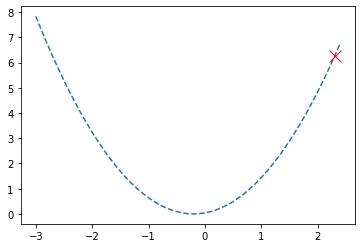

Fitness: 6.25


In [ ]:
# The value that we wish to evaluate
x = 2.3

# Visualise its fitness, and where it lies on the function (note that visualisations like this
# are only possible with very simple problems - these search techniques are normally used on
# much more complex problems!)
visualiseSpace(x)
print('Fitness: ' + str(objective(x)))

As you can see, the value of x we tried here was 2.3, and the red X is where that value lies on the objective function. **Try other values for x to try and find the optimal value for x - what value achieves a fitness of 0?**

This is a very simple problem that we defined just for demonstration purposes and it's fairly easy to find the optimal value of x, but you still had to iteratively try a few different values to find it. Instead of doing this manually, we can design a local search algorithm to do this for us.

First, we define our mutation operator. In this code, it simply takes a step of plus 0.1 or negative 0.1.

In [ ]:
import random

def mutationOperator(x):
    step_size = [-0.1, 0.1]
    return round(x + random.choice(step_size),2)

Let's start with a random value for x, let's say 2.3

In [ ]:
current_x = 2.3
# Get its fitness
current_fitness = objective(current_x)

print("Starting X:",current_x," with a fitness of:", current_fitness)

Starting X: 2.3  with a fitness of: 6.25


We can now try to randomly step in different directions and see how much of a difference that makes to the fitness

In [ ]:
new_x = mutationOperator(current_x)
new_fitness = objective(new_x)

print("New X:",new_x," with a fitness of:", new_fitness)

New X: 2.4  with a fitness of: 6.76


See how it made a small change to X which now has a different fitness? Now that we have the ability to make steps, we need to accept good steps, and reject bad steps

In [ ]:
# Slightly alter our current X's value
new_x = mutationOperator(current_x)
# Get its fitness
new_fitness = objective(new_x)
# Decide if we want to keep it
if(new_fitness < current_fitness):
    current_x = new_x
    current_fitness = new_fitness

print("Current X:",current_x," with a fitness of:", current_fitness)

Current X: 2.3  with a fitness of: 6.25


Running this cell enough times will eventually get to the optimum value for x! Let's put it all together, and instead of running it lots of times manually, we put in a loop.

Starting X: 2.2  with a fitness of: 5.76
Starting X: 2.2  with a fitness of: 5.76
Starting X: 2.2  with a fitness of: 5.76
Starting X: 2.1  with a fitness of: 5.29
Starting X: 2.1  with a fitness of: 5.29
Starting X: 2.1  with a fitness of: 5.29
Starting X: 2.0  with a fitness of: 4.84
Starting X: 1.9  with a fitness of: 4.41
Starting X: 1.8  with a fitness of: 4.0
Starting X: 1.7  with a fitness of: 3.61
Starting X: 1.7  with a fitness of: 3.61
Starting X: 1.7  with a fitness of: 3.61
Starting X: 1.6  with a fitness of: 3.24
Starting X: 1.5  with a fitness of: 2.89
Starting X: 1.5  with a fitness of: 2.89
Starting X: 1.5  with a fitness of: 2.89
Starting X: 1.5  with a fitness of: 2.89
Starting X: 1.4  with a fitness of: 2.56
Starting X: 1.4  with a fitness of: 2.56
Starting X: 1.3  with a fitness of: 2.25
Starting X: 1.2  with a fitness of: 1.96
Starting X: 1.1  with a fitness of: 1.69
Starting X: 1.1  with a fitness of: 1.69
Starting X: 1.1  with a fitness of: 1.69
Starting X: 1.0  

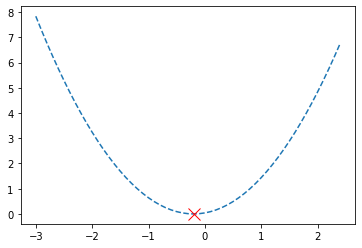

In [ ]:
current_x = 2.3
current_fitness = objective(current_x)

for i in range(0,100):
    # mutate the current solution
    new_x = mutationOperator(current_x)
    # evaluate it
    new_fitness = objective(new_x)

    if(new_fitness < current_fitness):
        current_x = new_x
        current_fitness = new_fitness

    print("Starting X:",current_x," with a fitness of:", current_fitness)

visualiseSpace(current_x)

Did it find the optimum? This is because it didn't run for enough iterations. **Change the number of iterations in the loop and give it an adequate range to find the optimum. How many iterations were necessary? If you are wondering how many iterations we should use - this is a great discussion point for the discussion boards!**

Now that we have a local search, let's explore its limitations. We will now look at a different objective function that has local and global optimums.

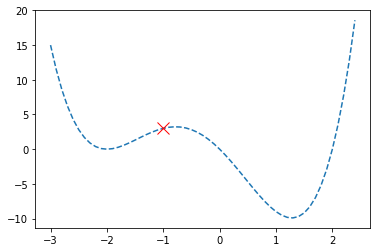

In [ ]:
# objective function
def objective(x):
    return (x - 2.0) * x * (x + 2.0)**2.0

x = -1
visualiseSpace(x)

Now that we have a new objective function, we can put our loop from earlier in a function called localSearch - this just makes it easier to call.

In [ ]:
def localSearch(current_x):
    current_fitness = objective(current_x)

    for i in range(0,25):
        # mutate the current solution
        new_x = mutationOperator(current_x)
        # evaluate it
        new_fitness = objective(new_x)

        if(new_fitness < current_fitness):
            current_x = new_x
            current_fitness = new_fitness

        print("Current X:",current_x," with a fitness of:", current_fitness)
    return current_x

Try calling the localSearch function, and start with x=2

Current X: 1.9  with a fitness of: -2.8899000000000026
Current X: 1.9  with a fitness of: -2.8899000000000026
Current X: 1.8  with a fitness of: -5.198399999999999
Current X: 1.8  with a fitness of: -5.198399999999999
Current X: 1.7  with a fitness of: -6.9819
Current X: 1.6  with a fitness of: -8.2944
Current X: 1.6  with a fitness of: -8.2944
Current X: 1.5  with a fitness of: -9.1875
Current X: 1.4  with a fitness of: -9.7104
Current X: 1.4  with a fitness of: -9.7104
Current X: 1.4  with a fitness of: -9.7104
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.909899999999999
Current X: 1.3  with a fitness of: -9.90989999999

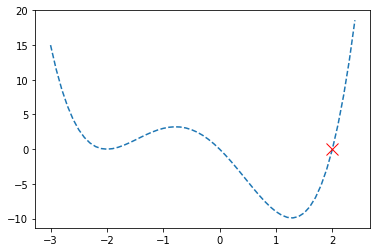

Optimised X


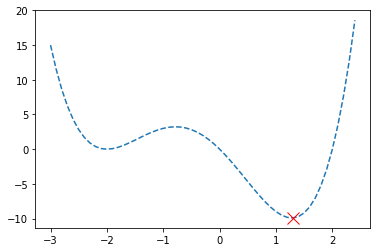

In [ ]:
starting_x = 2
end_x = localSearch(starting_x)
# Visualise where the search began
print('')
print('Starting X')
visualiseSpace(starting_x)
# Visualise where the search completed
print('Optimised X')
visualiseSpace(end_x)

Did it find the global optimum? Try the search again, but this time, start the search at x=-1

Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.1  with a fitness of: 2.7620999999999998
Current X: -1.2  with a fitness of: 2.4576000000000002
Current X: -1.3  with a fitness of: 2.1020999999999996
Current X: -1.3  with a fitness of: 2.1020999999999996
Current X: -1.4  with a fitness of: 1.7136000000000005
Current X: -1.4  with a fitness of: 1.7136000000000005
Current X: -1.5  with a fitness of: 1.3125
Current X: -1.6  with a fitness of: 0.9215999999999996
Current X: -1.7  with a fitness of: 0.5661000000000002
Current X: -1.7  with a fitness of: 0.5661000000000002
Current X: -1.8  with a fitness of: 0.27359999999999984
Current X: -1.9  with a fitness of: 0.07410000000000012
Current X: -2.0  wit

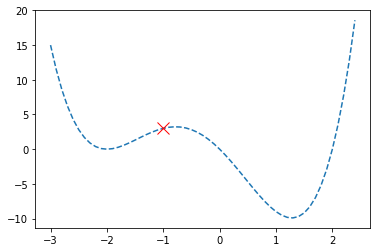

Optimised X


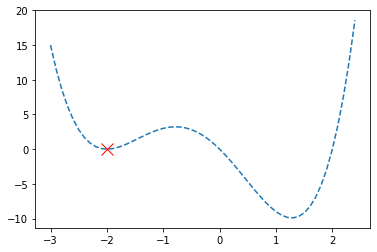

In [ ]:
starting_x = -1
end_x = localSearch(starting_x)
# Visualise where the search began
print('')
print('Starting X')
visualiseSpace(starting_x)
# Visualise where the search completed
print('Optimised X')
visualiseSpace(end_x)

Well that's interesting! The local search got stuck in a local optimum - this is because it cannot make the deteriorating steps that would be required to get it to the global optimum. **Can you name an algorithm that might be able to deal with local optima better than local search?**

# Section 7.6 - Feature Projection

## Linear feature projection - unsupervised

In this practical, we are going to try the linear feature projection technique known as Principal Component Analysis. To begin, we import all the necessary libraries and data that we associate with a machine learning project.

In [ ]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Load data
digits = datasets.load_breast_cancer()
X = digits.data
y = digits.target

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


With PCA, it's important that we scale the data across all of the features. This is very important as PCA seeks to minimise variance, and if the features have different scales, it will seek to minimise the variance with the largest scale, rather than the largest variance. Remember that we need to scale the test data in the same way, but we should scale it based only on the scales we see in the training data - we should never derive information from the testing data!

In [ ]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

As you can see when we expect the shape of the training data, there are 4 features and 100 samples

In [ ]:
X_train.shape

(381, 30)

And now we are ready to perform PCA! We can choose how many principal components to calculate, with the first explaining the most variance, the second explaining the second most variance, and so on. Here, we begin by calculating the first 10 PCs.

In [ ]:
# Import the PCA toolkit
from sklearn.decomposition import PCA

# Calculate the first 10 principal components
numb_PC = 10
pca = PCA(n_components=numb_PC)
X_train_PCA = pca.fit_transform(X_train)

Note that we used fit_transform on the training data - this means that we calculated the principal components for the training data, and then applied them to that data. But just how much variance was explained by each PC? How many PC are useful? We can extract that information like this:

In [ ]:
# How much variance is explained by each variance?
explained_variance =pca.explained_variance_ratio_
print(explained_variance)

[0.43203436 0.19853475 0.09808165 0.06500311 0.05150982 0.04204207
 0.02264712 0.0169758  0.01297545 0.0121151 ]


In order, we can see that around 43% of the variance was explained by the first PC, 19.85% of the variance is explained by the second PC, 9.8% by the third PC, and so on. We can understand quite a lot just by looking at these raw values, but visualising them will make it easier to see just how many PC we should use.

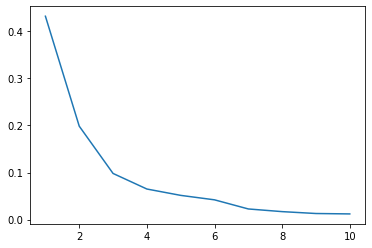

In [ ]:
from matplotlib import pyplot
from numpy import arange
from matplotlib import pyplot
# Plot the variance
pyplot.plot(arange(1, numb_PC+1), explained_variance)
pyplot.show()

Here you can see that the amount of variance explained by the first PC is substantial, quite a lot by the second, and by the fourth, we see very little additional variance explained by the remaining PC.

Now that we have the new features generated by PCA, we can test them. As these were generated independently of a classifier, we can test multiple different classifiers to see if it benefits any model more than others. We start by defining some functions for easier testing of the new features. You should understand all the code here, but it isn't important for understanding PCA.

In [ ]:
# Import the classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time


# We will be testing a few classifiers, so making a function will help keep our code clean
def testClassifier(model, training_data, testing_data):
    model.fit(training_data, y_train)
    model_pred = model.predict(testing_data)
    model_score = round(sum(model_pred == y_test)/len(y_test),4)
    return model_score

def testAllClassifier(training_data, testing_data):
    # Get a time stamp so we can see how long it takes
    start_time = time.perf_counter()

    # Test using a MLP
    mlp_model = MLPClassifier(max_iter=2000)
    mlp_score = testClassifier(mlp_model, training_data, testing_data)
    # Test using a k-NN
    knn_model = KNeighborsClassifier()
    knn_score = testClassifier(knn_model, training_data, testing_data)
    # Test using a Decision Tree
    tree_model = DecisionTreeClassifier()
    tree_score = testClassifier(tree_model, training_data, testing_data)

    # Calculate the total time taken to train and test all of the classifiers
    time_elapsed = time.perf_counter()-start_time

    return [mlp_score, knn_score, tree_score, time_elapsed]

Now we can perform some experimentation with our new features! Let's start by testing the original training data to create a control to compare against.

In [ ]:
# Start by testing the entire, untransformed training and testing data
classifier_scores = testAllClassifier(X_train, X_test)
print("Trained on full dataset X:", "MLP:", str(classifier_scores[0]),"KNN:", str(classifier_scores[1]),"Tree:", str(classifier_scores[2]),"  (Time elapsed:", str(classifier_scores[2]),")")

Trained on full dataset X: MLP: 0.984 KNN: 0.9574 Tree: 0.9309   (Time elapsed: 0.9309 )


As you can see, we have each classifiers accuracy on the *testing* data. Now we can try training and testing the models using only the first principal component.

In [ ]:
# Calcuate just the first (dominant) principal component
pca = PCA(n_components=1)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

classifier_scores = testAllClassifier(X_train_PCA, X_test_PCA)
print("Trained on the domininant principal components:", "MLP:", str(classifier_scores[0]),"KNN:", str(classifier_scores[1]),"Tree:", str(classifier_scores[2]),"   (Time elapsed:", str(classifier_scores[2]),")")

Trained on the domininant principal components: MLP: 0.9202 KNN: 0.8936 Tree: 0.8457    (Time elapsed: 0.8457 )


As you can see, the model performs worse with just one PC with this problem. This isn't always the case, but here we need to include more PCs in the model to encompass enough of the variance. The code below will try more and more PC with each iteration of the loop.

In [ ]:
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)

    classifier_scores = testAllClassifier(X_train_PCA, X_test_PCA)
    print("Trained on", i, "principal components:", "MLP:", str(classifier_scores[0]),"KNN:", str(classifier_scores[1]),"Tree:", str(classifier_scores[2]),"   (Time elapsed:", str(classifier_scores[2]),")")

Trained on 1 principal components: MLP: 0.9149 KNN: 0.8936 Tree: 0.8457    (Time elapsed: 0.8457 )
Trained on 2 principal components: MLP: 0.9628 KNN: 0.9415 Tree: 0.8883    (Time elapsed: 0.8883 )
Trained on 3 principal components: MLP: 0.9574 KNN: 0.9202 Tree: 0.8936    (Time elapsed: 0.8936 )
Trained on 4 principal components: MLP: 0.9628 KNN: 0.9574 Tree: 0.9149    (Time elapsed: 0.9149 )
Trained on 5 principal components: MLP: 0.9734 KNN: 0.9628 Tree: 0.9362    (Time elapsed: 0.9362 )
Trained on 6 principal components: MLP: 0.9574 KNN: 0.9574 Tree: 0.9255    (Time elapsed: 0.9255 )
Trained on 7 principal components: MLP: 0.9628 KNN: 0.9574 Tree: 0.9255    (Time elapsed: 0.9255 )
Trained on 8 principal components: MLP: 0.9681 KNN: 0.9574 Tree: 0.9309    (Time elapsed: 0.9309 )
Trained on 9 principal components: MLP: 0.9681 KNN: 0.9574 Tree: 0.9149    (Time elapsed: 0.9149 )


You can see how each of the classifiers were affected slightly differently to the use of PCA - **you can add additional classifiers to the above loop and test them too.**


With this dataset, reducing the dimensionality with PCA tended to reduce the performance of our models, but if we look at the time elapsed, you will notice that it did speed up the training and testing time of the models.

Our findings here identify important considerations for the use of feature projection:
- in some problems, it will increase the predictive accuracy of our models, but in some problems, it will cause a deterioration. We need to test our models to find out if it will help.
- in some problems, model training and testing takes too long. PCA can reduce these times, making some models a practical option that would not have been possible with the unprocessed features.

# Session 7.7 - Feature Selection

In this practical, we will be attempting to answer the questions: "Do we need all these features?", "Could we remove one or more for a better model?"

As before, we will need to start by setting up a problem to apply Feature Selection to.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

X, y = datasets.load_breast_cancer(return_X_y=True)

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

# Create a model and set the splits for k fold cross validation
tree_model = DecisionTreeClassifier()
splits = KFold(n_splits=10)

And now we can establish the performance of a model trained on the entire dataset (before feature selection)

In [ ]:
cv_score = np.mean(cross_val_score(tree_model, X_train, y_train, cv=splits, scoring='accuracy'))
print("Cross Validation Score with all features: ", str(cv_score))

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Test data score with all features: ", str(sum(y_pred == y_test)/len(y_test)))

Cross Validation Score with all features:  0.9454545454545455
Test data score with all features:  0.881578947368421


To begin, we will consider Filter based feature selection.

### Filter Methods

One of the simplest ways to remove features that are unhelpful, is to calculate how well they correlate with the variable we wish to predict. We will now look at how strongly each feature correlates with the outcome variable

In [ ]:
for i in range(0,X_train.shape[1]):
    corr_coeff = np.corrcoef(X_train[:,i], y_train)[0,1]
    print("Correlation for feature", i, ":", corr_coeff)

Correlation for feature 0 : -0.7388522174266782
Correlation for feature 1 : -0.4221202658244096
Correlation for feature 2 : -0.7496928050073911
Correlation for feature 3 : -0.6927943422874434
Correlation for feature 4 : -0.4395754150308515
Correlation for feature 5 : -0.6757134761210114
Correlation for feature 6 : -0.7598490816397308
Correlation for feature 7 : -0.7977572284540031
Correlation for feature 8 : -0.41549612482437503
Correlation for feature 9 : -0.06883464126719188
Correlation for feature 10 : -0.5544869267897183
Correlation for feature 11 : 0.012971032995513655
Correlation for feature 12 : -0.5398457235580976
Correlation for feature 13 : -0.47734739570896256
Correlation for feature 14 : 0.12637386832825342
Correlation for feature 15 : -0.34285318865204345
Correlation for feature 16 : -0.3669811205468624
Correlation for feature 17 : -0.457858177216817
Correlation for feature 18 : 0.0007555555240847614
Correlation for feature 19 : -0.1556348028181592
Correlation for feature 

As you can see here, some of these variables have very low correlations (note: correlations are low when they are close to zero, and -1 is a very strong correlation!). Let's try removing one of the lowest correlation features and test again.

In [ ]:
# We can use a list of boolean variables to represent which features we want to keep
features_to_include = [True] * (X_train.shape[1])
# To remove a feature, we just set the boolean at its index to false. Here we are removing feature 18
features_to_include[18] = False

# Use this list to index the columns, and it will use only the features that are set to True
score = np.mean(cross_val_score(tree_model, X_train[:, features_to_include], y_train, cv=splits, scoring='accuracy'))
print("Cross Validation Score after removing a feature: ", str(score))
# Add check it's performance on the unseen test data
tree_model.fit(X_train[:, features_to_include], y_train)
y_pred = tree_model.predict(X_test[:, features_to_include])
print("Test Set Score after removing a feature: ", str(sum(y_pred == y_test)/len(y_test)))

Cross Validation Score after removing a feature:  0.9462121212121211
Test Set Score after removing a feature:  0.8947368421052632


Did this improve the model's performance? **Try setting a few of the other lower correlated features to False and see how it changes the model's efficacy.**

As filter methods are independent of the model, you can try other classifiers.

**Change the model below and experiment with how well filter selection works for them.**

In [ ]:
# We can use a list of boolean variables to represent which features we want to keep
features_to_include = [True] * (X_train.shape[1])

# To remove a feature, we just set the boolean at its index to false. Here we are removing feature 18,
# feel free to remove other features here too
features_to_include[18] = False # REMOVE OTHER FEATURES LIKE THIS
model = KNeighborsClassifier() # CHANGE THE MODEL HERE

# Use this list to index the columns, and it will use only the features that are set to True
score = np.mean(cross_val_score(model, X_train[:, features_to_include], y_train, cv=splits, scoring='accuracy'))
print("Cross Validation Score after removing a feature: ", str(score))
# Add check it's performance on the unseen test data
model.fit(X_train[:, features_to_include], y_train)
y_pred = model.predict(X_test[:, features_to_include])
print("Test Set Score after removing a feature: ", str(sum(y_pred == y_test)/len(y_test)))

Cross Validation Score after removing a feature:  0.9454545454545453
Test Set Score after removing a feature:  0.8771929824561403


Scikit Learn provides an easy to use library to perform filter feature selection. In this case, it uses chi square. **Try different numbers of features by varying the value of *k*. Then, visit https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest and find other metrics to use.**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the k best features (in this case, 2 features) as defined by their chi2 scores
X_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)

# Use this list to index the columns, and it will use only the features that are set to True
score = np.mean(cross_val_score(tree_model, X_new, y_train, cv=splits, scoring='accuracy'))
print("Cross Validation Score after feature selection: ", str(score))

Cross Validation Score after feature selection:  0.9363636363636363


### Embedded Methods

Embedded methods use the values calculated within the models to choose which features to use. A powerful model that can be used in this case is Random Forest. Start by training a Random Forest model.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier()

Now that we have the Random Forest classifier, we test it to evaluate its performance prior to feature selection.

In [ ]:
# Use this list to index the columns, and it will use only the features that are set to True
score = np.mean(cross_val_score(tree_model, X_train, y_train, cv=splits, scoring='accuracy'))
print("Cross Validation score prior to feature selection: ", str(score))
# Add check it's performance on the unseen test data
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("Test Set score prior to feature selection: ", str(sum(y_pred == y_test)/len(y_test)))

Cross Validation score prior to feature selection:  0.9545454545454545
Test Set score prior to feature selection:  0.8837719298245614


Within the Random Forest, each feature contributed to reducing node impurity, and this can be used to measure their importance.

In [ ]:
print("Random Forest feature importances:", str(model.feature_importances_))

Random Forest feature importances: [0.03226486 0.01279478 0.03024197 0.0392047  0.00233373 0.01003651
 0.07865268 0.11401767 0.00338379 0.00079196 0.02034134 0.00470475
 0.02956319 0.06049483 0.00306875 0.00317758 0.         0.00282269
 0.001827   0.00190372 0.09457816 0.00994226 0.09866355 0.16341778
 0.00234077 0.01975649 0.05060314 0.09757482 0.01070106 0.00079546]


We can index which of these features that we want to keep just like we did earlier, but Scikit Learn also provides an easier to use function for this too. By using SelectFromModel, only features that have an above average reduction in node impurity are selected, and we don't need to choose the number to keep.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Create and fit the model
rf_reduced_model = SelectFromModel(RandomForestClassifier(n_estimators = 100))
rf_reduced_model.fit(X_train, y_train)
# After the model is fitted, interogate the model for which features were most important
features_to_include = rf_reduced_model.get_support()

Now that we have the features we wish to include, we can train and test our model.

In [ ]:
# Use this list to index the columns, and it will use only the features that are set to True
score = np.mean(cross_val_score(tree_model, X_train[:, features_to_include], y_train, cv=splits, scoring='accuracy'))
print("Cross Validation Score after removing features: ", str(score))
# Add check it's performance on the unseen test data
tree_model.fit(X_train[:, features_to_include], y_train)
y_pred = tree_model.predict(X_test[:, features_to_include])
print("Test Set Score after removing features: ", str(sum(y_pred == y_test)/len(y_test)))

Cross Validation Score after removing features:  0.9181818181818182
Test Set Score after removing features:  0.881578947368421


### Wrapper methods

The final way in which we can perform feature selection is by using wrapper methods: these iteratively make a change to the feature subset, evaluate it, and then use what they learn in that iteration to guide the next. We start by implementing a very simply wrapper method using *local search*, much like the one you seen in an earlier practical.

Like before, we need a mutation operator. This one simply looks at all of the booleans that represent the features in our data, and randomly flips one - if it was previously included, it is now excluded, and if it was previously excluded, it is now included.

In [ ]:
import random

def mutationOperator(features):
    feat_to_flip = random.choice(range(0,len(features)))

    if(features[feat_to_flip] ==True):
        features[feat_to_flip] = False
    else:
        features[feat_to_flip] = True

    return features

And again, just like before, we need an objective function. In this case, it is the cross validation accuracy when the given features are available.

In [ ]:
def objective(x_train, y_train, model, features_to_include):
    # Determine the splits
    splits = KFold(n_splits=10)
    # Test Model
    score = np.mean(cross_val_score(model, X_train[:, features_to_include], y_train, cv=splits, scoring='accuracy'))
    return score

Just like before, we use a function for the local search to make it easier to call. Note that it looks a lot like the one we made in the previous practical - **compare them and see where they differ.**

In [ ]:
def localSearchFeatureSelection(x_train, y_train, model, current_x, number_of_iterations):
    current_fitness = objective(x_train, y_train, model, current_x)

    for i in range(0,number_of_iterations):
        # mutate the current solution
        new_x = mutationOperator(current_x.copy())
        # evaluate it
        new_fitness = objective(x_train, y_train, model, new_x)

        if(new_fitness > current_fitness):
            current_x = new_x
            current_fitness = new_fitness

        print("Iteration",i, ": Selected Features:", str(sum(current_x)),"/",str(x_train.shape[1]),"Fitness:", current_fitness)
    return current_x

And as always, we try with the full feature subset to establish a baseline.

In [ ]:
# We'll use a decision tree
model = DecisionTreeClassifier()
# every feature is set to True in that it should be included
all_features = [True] * (X_train.shape[1])
# We can test the full feature subset like this
print("The cross validation accuracy on the full training data is", objective(X_train, y_train, model, all_features))

The cross validation accuracy on the full training data is 0.9454545454545455


Since we have got everything already contained within functions, the local search can be called easily.

In [ ]:
number_of_iterations = 100
best_subset = localSearchFeatureSelection(X_train, y_train, model, all_features, number_of_iterations)

Iteration 0 : Selected Features: 29 / 30 Fitness: 0.9462121212121213
Iteration 1 : Selected Features: 29 / 30 Fitness: 0.9462121212121213
Iteration 2 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 3 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 4 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 5 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 6 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 7 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 8 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 9 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 10 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 11 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 12 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 13 : Selected Features: 28 / 30 Fitness: 0.9545454545454545
Iteration 14 : Selected Featur

Did this method find a better scoring feature subset? How many features did it remove? Try run it all again to see if you get the same results - as this has a random element, we can never be sure of getting the same results each time! **(Remember that you will need to run the cell which resets the 'all_features' list to all True)**

Recently, Scikit Learn has been updated to include wrapper methods - but are not yet available (when this project was released) with Anaconda.

One of these methods is Sequential Forward Selection - this iterative process tries creating a seperate model for every potential feature. It then tests each, and selects the best. It then creates every possible pair of features that include the best feature, trains seperate models for each pair, testing and choosing the best pair. It then creates every possible thruple that contain the best couple, and tests and selects the best thruple. It continues doing this to find the desired number of features.

As you can imagine, this is a computationally expensive process, but often provides good results. In order to learn more or try it, visit this page https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html.